There are 6964 duplicate IDs for 8523 total entries
Skew is: 1.1775306028542798
Kurtosis: 1.615877


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


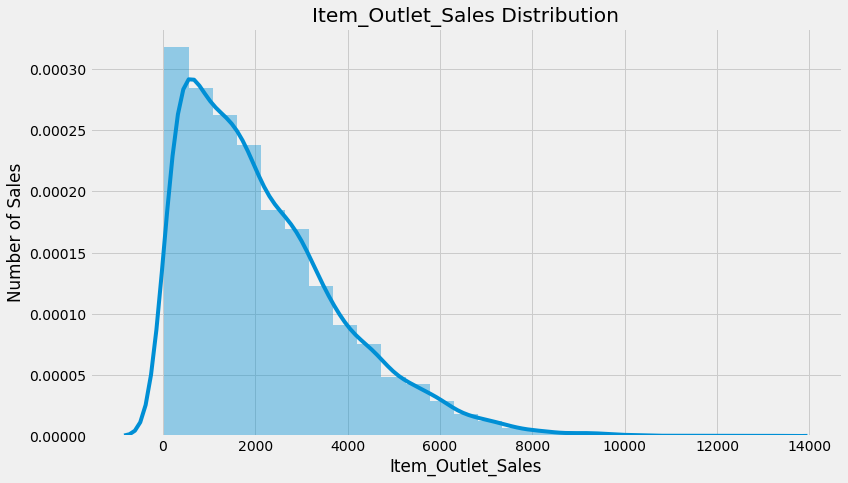

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings # Ignores any warning
warnings.filterwarnings("ignore")
train = pd.read_csv('C:\Chaitra\LearnProjects\BigMart Sales\Train_File.csv')
test = pd.read_csv('C:\Chaitra\LearnProjects\BigMart Sales\Test_File.csv')

train.head()

#Check for duplicates
idsUnique = len(set(train.Item_Identifier))
idsTotal = train.shape[0]
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")


plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(train.Item_Outlet_Sales, bins = 25)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,1))
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Number of Sales")
plt.title("Item_Outlet_Sales Distribution")

print ("Skew is:", train.Item_Outlet_Sales.skew())
print("Kurtosis: %f" % train.Item_Outlet_Sales.kurt())


numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

corr =numeric_features.corr()
corr

In [6]:
print(corr['Item_Outlet_Sales'].sort_values(ascending=False))

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64


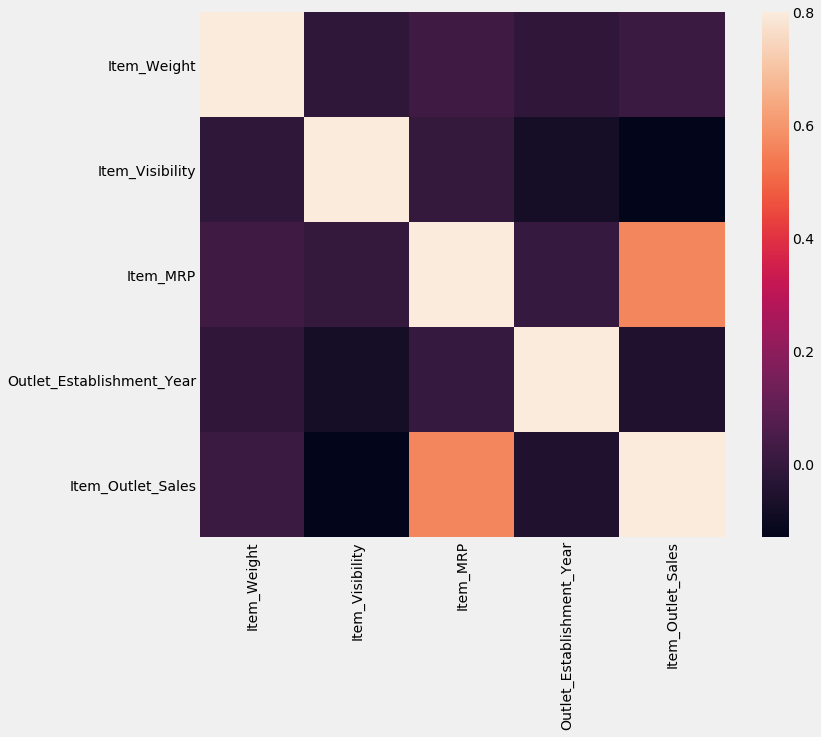

In [7]:
#correlation matrix
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True);

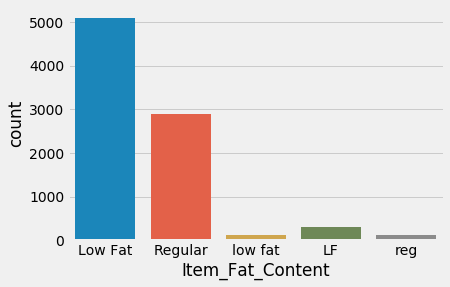

In [8]:
sns.countplot(train.Item_Fat_Content)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

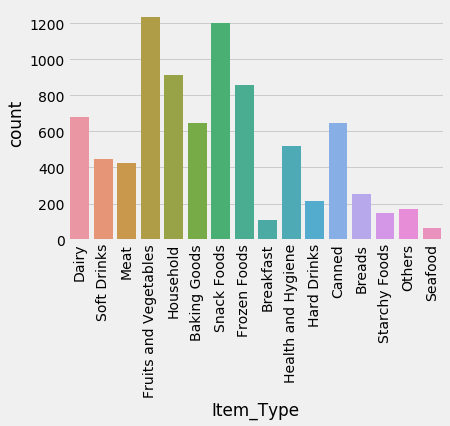

In [9]:
sns.countplot(train.Item_Type)
plt.xticks(rotation=90)

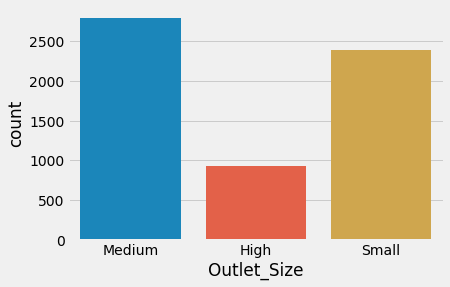

In [10]:
sns.countplot(train.Outlet_Size)

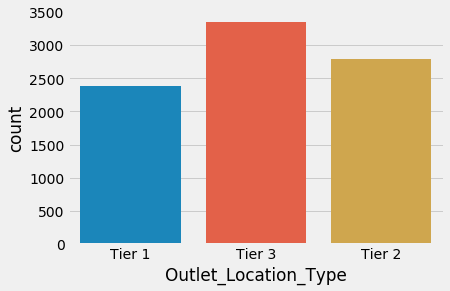

In [11]:
sns.countplot(train.Outlet_Location_Type)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

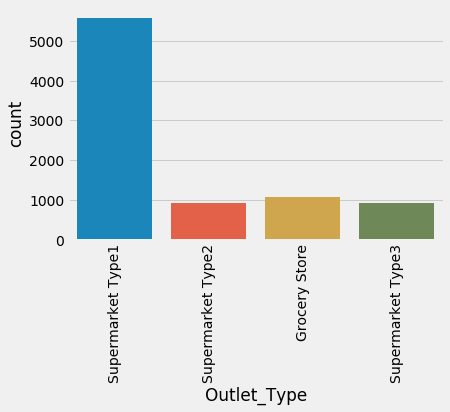

In [12]:
sns.countplot(train.Outlet_Type)
plt.xticks(rotation=90)

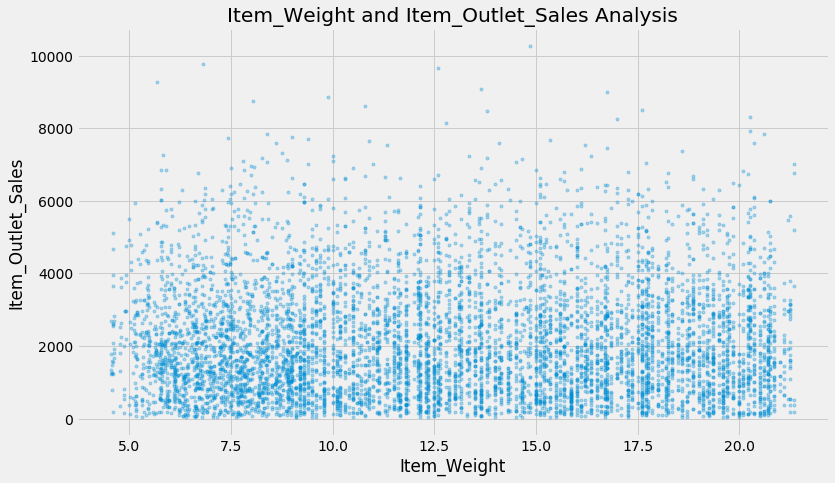

In [13]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")
plt.plot(train.Item_Weight, train["Item_Outlet_Sales"],'.', alpha = 0.3)

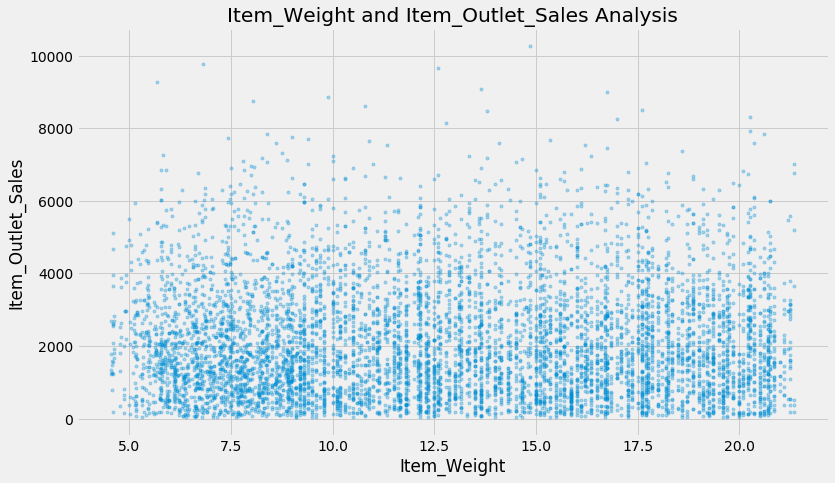

In [14]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")
plt.plot(train.Item_Weight, train["Item_Outlet_Sales"],'.', alpha = 0.3)

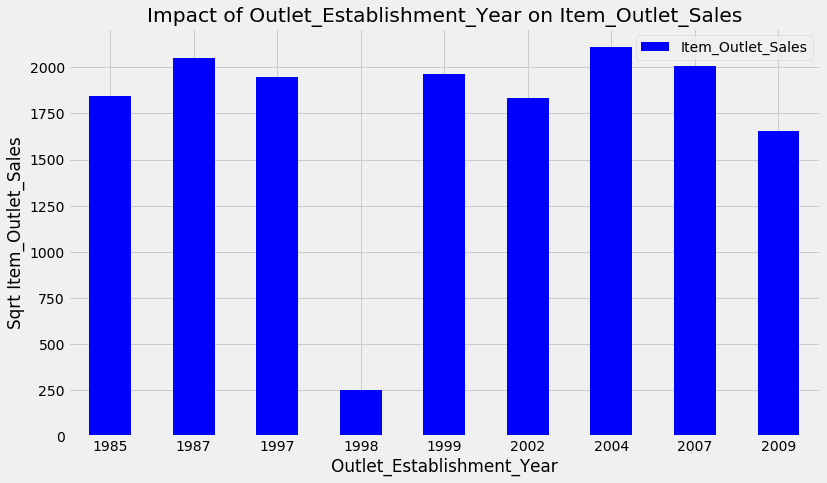

In [15]:
Outlet_Establishment_Year_pivot = \
train.pivot_table(index='Outlet_Establishment_Year', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Establishment_Year_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Sqrt Item_Outlet_Sales")
plt.title("Impact of Outlet_Establishment_Year on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

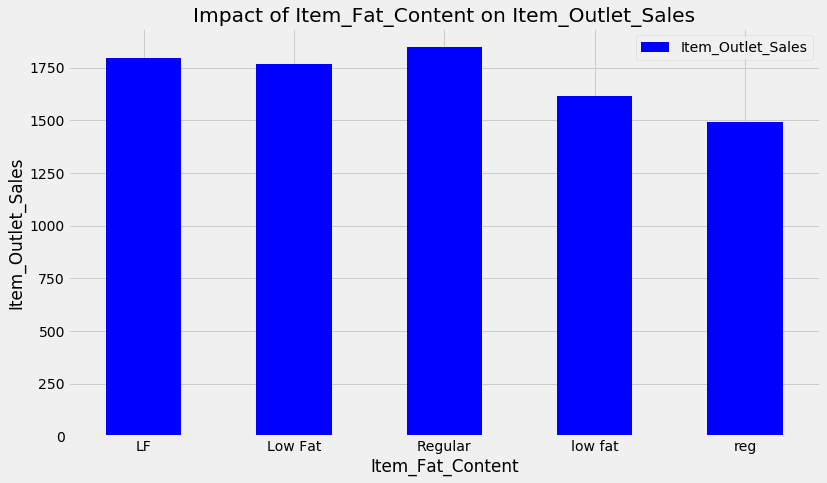

In [16]:
Item_Fat_Content_pivot = \
train.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)
Item_Fat_Content_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

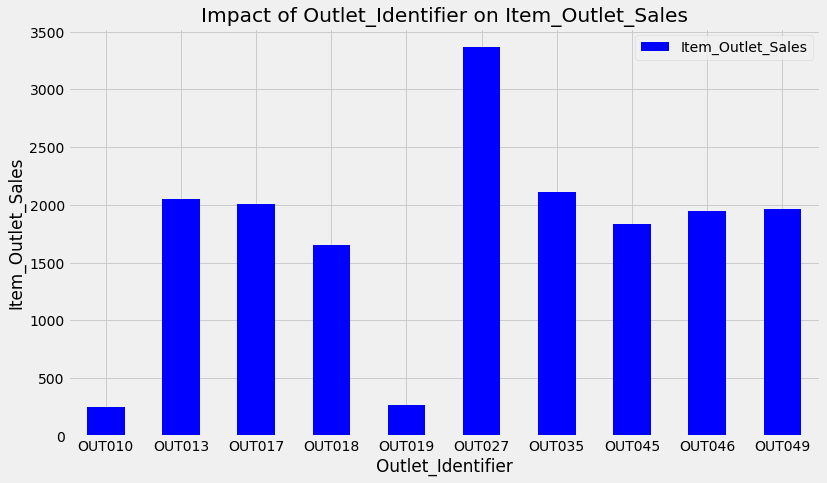

In [20]:
Outlet_Identifier_pivot = \
train.pivot_table(index='Outlet_Identifier', values='Item_Outlet_Sales', aggfunc=np.median)
Outlet_Identifier_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Identifier")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Identifier on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [24]:
train.pivot_table(values='Outlet_Type', columns='Outlet_Identifier',aggfunc=lambda x:x.mode())
train.pivot_table(values='Outlet_Type', columns='Outlet_Size',aggfunc=lambda x:x.mode())

Outlet_Size,High,Medium,Small
Outlet_Type,Supermarket Type1,Supermarket Type3,Supermarket Type1


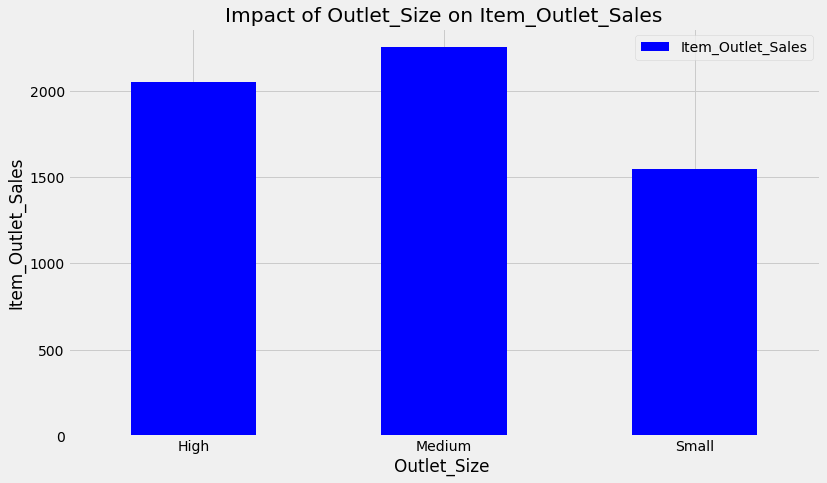

In [26]:
Outlet_Size_pivot = \
train.pivot_table(index='Outlet_Size', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Size_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Size ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Size on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

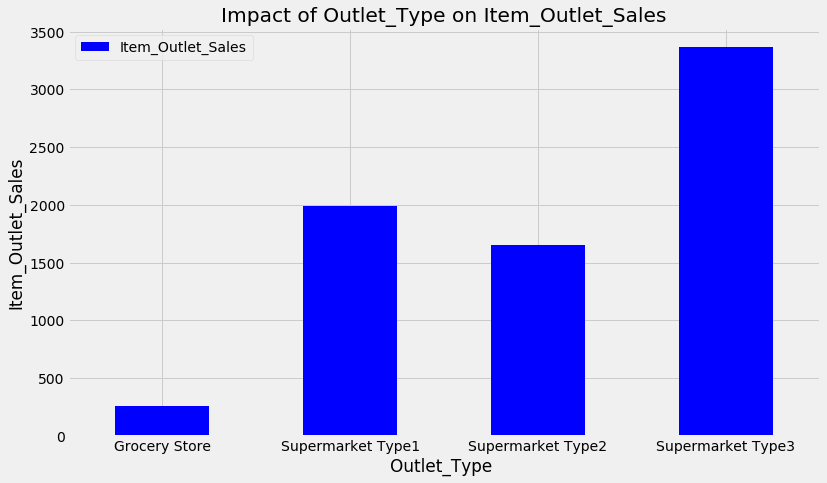

In [27]:
Outlet_Type_pivot = \
train.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Type_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Type ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()


In [28]:
# Join Train and Test Dataset
#Create source column to later separate the data easily
train['source']='train'
test['source']='test'
data = pd.concat([train,test], ignore_index = True)
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


In [29]:
#Check the percentage of null values per variable
data.isnull().sum()/data.shape[0]*100 #show values in percentage

Item_Fat_Content              0.000000
Item_Identifier               0.000000
Item_MRP                      0.000000
Item_Outlet_Sales            39.995776
Item_Type                     0.000000
Item_Visibility               0.000000
Item_Weight                  17.171219
Outlet_Establishment_Year     0.000000
Outlet_Identifier             0.000000
Outlet_Location_Type          0.000000
Outlet_Size                  28.273726
Outlet_Type                   0.000000
source                        0.000000
dtype: float64

In [30]:
#aggfunc is mean by default! Ignores NaN by default
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')
print(item_avg_weight)

                 Item_Weight
Item_Identifier             
DRA12                 11.600
DRA24                 19.350
DRA59                  8.270
DRB01                  7.390
DRB13                  6.115
DRB24                  8.785
DRB25                 12.300
DRB48                 16.750
DRC01                  5.920
DRC12                 17.850
DRC13                  8.260
DRC24                 17.850
DRC25                  5.730
DRC27                 13.800
DRC36                 13.000
DRC49                  8.670
DRD01                 12.100
DRD12                  6.960
DRD13                 15.000
DRD15                 10.600
DRD24                 13.850
DRD25                  6.135
DRD27                 18.750
DRD37                  9.800
DRD49                  9.895
DRD60                 15.700
DRE01                 10.100
DRE03                 19.600
DRE12                  4.590
DRE13                  6.280
...                      ...
NCX05                 15.200
NCX06         

In [32]:
#Note: The previous ideia becomes more clear if you run this.
data[:][data['Item_Identifier'] == 'DRI11']
def impute_weight(cols):
    Weight = cols[0]
    Identifier = cols[1]
    
    if pd.isnull(Weight):
        return item_avg_weight['Item_Weight'][item_avg_weight.index == Identifier]
    else:
        return Weight
print ('Orignal #missing: %d'%sum(data['Item_Weight'].isnull()))
data['Item_Weight'] = data[['Item_Weight','Item_Identifier']].apply(impute_weight,axis=1).astype(float)
print ('Final #missing: %d'%sum(data['Item_Weight'].isnull()))

Orignal #missing: 2439
Final #missing: 0


In [33]:
#Import mode function:
from scipy.stats import mode
#Determing the mode for each
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=lambda x:x.mode())
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [34]:
def impute_size_mode(cols):
    Size = cols[0]
    Type = cols[1]
    if pd.isnull(Size):
        return outlet_size_mode.loc['Outlet_Size'][outlet_size_mode.columns == Type][0]
    else:
        return Size
print ('Orignal #missing: %d'%sum(data['Outlet_Size'].isnull()))
data['Outlet_Size'] = data[['Outlet_Size','Outlet_Type']].apply(impute_size_mode,axis=1)
print ('Final #missing: %d'%sum(data['Outlet_Size'].isnull()))

Orignal #missing: 4016
Final #missing: 0


In [35]:
#Creates pivot table with Outlet_Type and the mean of #Item_Outlet_Sales. Agg function is by default mean()
data.pivot_table(values='Item_Outlet_Sales', columns='Outlet_Type')

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Outlet_Sales,339.8285,2316.181148,1995.498739,3694.038558


In [37]:
def impute_visibility_mean(cols):
    visibility = cols[0]
    item = cols[1]
    if visibility == 0:
        return visibility_item_avg['Item_Visibility'][visibility_item_avg.index == item]
    else:
        return visibility
print ('Original #zeros: %d'%sum(data['Item_Visibility'] == 0))
data['Item_Visibility'] = data[['Item_Visibility','Item_Identifier']].apply(impute_visibility_mean,axis=1).astype(float)
print ('Final #zeros: %d'%sum(data['Item_Visibility'] == 0))

Original #zeros: 879


NameError: ("name 'visibility_item_avg' is not defined", 'occurred at index 3')

In [38]:
#Remember the data is from 2013
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()


count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [39]:
#Get the first two characters of ID:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',                                                      'NC':'Non-Consumable',                                                            'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [40]:
#Change categories of low fat:
print('Original Categories:')
print(data['Item_Fat_Content'].value_counts())
print('\nModified Categories:')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',                                                      'reg':'Regular',
'low fat':'Low Fat'})
print(data['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [41]:
#Mark non-consumables as separate category in low_fat:
data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [42]:
func = lambda x: x['Item_Visibility']/visibility_item_avg['Item_Visibility'][visibility_item_avg.index == x['Item_Identifier']][0]
data['Item_Visibility_MeanRatio'] = data.apply(func,axis=1).astype(float)
data['Item_Visibility_MeanRatio'].describe()

NameError: ("name 'visibility_item_avg' is not defined", 'occurred at index 0')

In [43]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [44]:
#Dummy Variables:
data = pd.get_dummies(data, columns =['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined','Outlet'])
data.dtypes

Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
source                        object
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Outlet_0                       uint8
O

In [53]:
#Drop the columns which have been converted to different types:
#data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)
#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]
#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)
#Export files as modified versions:
train.to_csv("C:\\Users\\chaitraramaiah.TEMENOSGROUP\\BigSales_train_modified.csv",index=False)
test.to_csv("C:\\Users\\chaitraramaiah.TEMENOSGROUP\\BigSales_test_modified.csv",index=False)

In [54]:
train_df = pd.read_csv('C:\\Users\\chaitraramaiah.TEMENOSGROUP\\BigSales_train_modified.csv')
test_df = pd.read_csv('C:\\Users\\chaitraramaiah.TEMENOSGROUP\\BigSales_test_modified.csv')

In [55]:
#Define target and ID columns:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
from sklearn import cross_validation, metrics
def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    
    #Remember the target had been normalized
    Sq_train = (dtrain[target])**2
#Perform cross-validation:
    cv_score = cross_validation.cross_val_score(alg, dtrain[predictors],Sq_train , cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(Sq_train.values, dtrain_predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)

C:\Chaitra\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [56]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression(normalize=True)
predictors = train_df.columns.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'])
modelfit(LR, train_df, test_df, predictors, target, IDcol, 'LR.csv')


Model Report
RMSE : 1.4e+07
CV Score : Mean - 9.124e+06 | Std - 1.029e+06 | Min - 7.769e+06 | Max - 1.172e+07


In [58]:
from sklearn.linear_model import Ridge
RR = Ridge(alpha=0.05,normalize=True)
modelfit(RR, train_df, test_df, predictors, target, IDcol, 'RR.csv')


Model Report
RMSE : 1.4e+07
CV Score : Mean - 9.126e+06 | Std - 1.047e+06 | Min - 7.748e+06 | Max - 1.175e+07


In [59]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(DT, train_df, test_df, predictors, target, IDcol, 'DT.csv')


Model Report
RMSE : 1.4e+07
CV Score : Mean - 8.588e+06 | Std - 8.748e+05 | Min - 7.291e+06 | Max - 1.057e+07


In [60]:
RF = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
modelfit(RF, train_df, test_df, predictors, target, IDcol, 'RF.csv')



Model Report
RMSE : 1.4e+07
CV Score : Mean - 8.605e+06 | Std - 8.938e+05 | Min - 7.429e+06 | Max - 1.082e+07


In [67]:
from xgboost import XGBRegressor
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(train_df[predictors], train_df[target], early_stopping_rounds=5, 
             eval_set=[(test_df[predictors], test_df[target])], verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.05, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [68]:
#Predict training set:
train_df_predictions = my_model .predict(train_df[predictors])
# make predictions
predictions = my_model .predict(test_df[predictors])
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_df[target])))
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((train_df[target]).values, train_df_predictions)))
IDcol.append(target)
submission = pd.DataFrame({ x: test_df[x] for x in IDcol})
submission.to_csv("merda.csv", index=False)

Mean Absolute Error : 131.10913214228233
RMSE : 1057


In [66]:
pip install xgboost


The following command must be run outside of the IPython shell:

    $ pip install xgboost

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/
